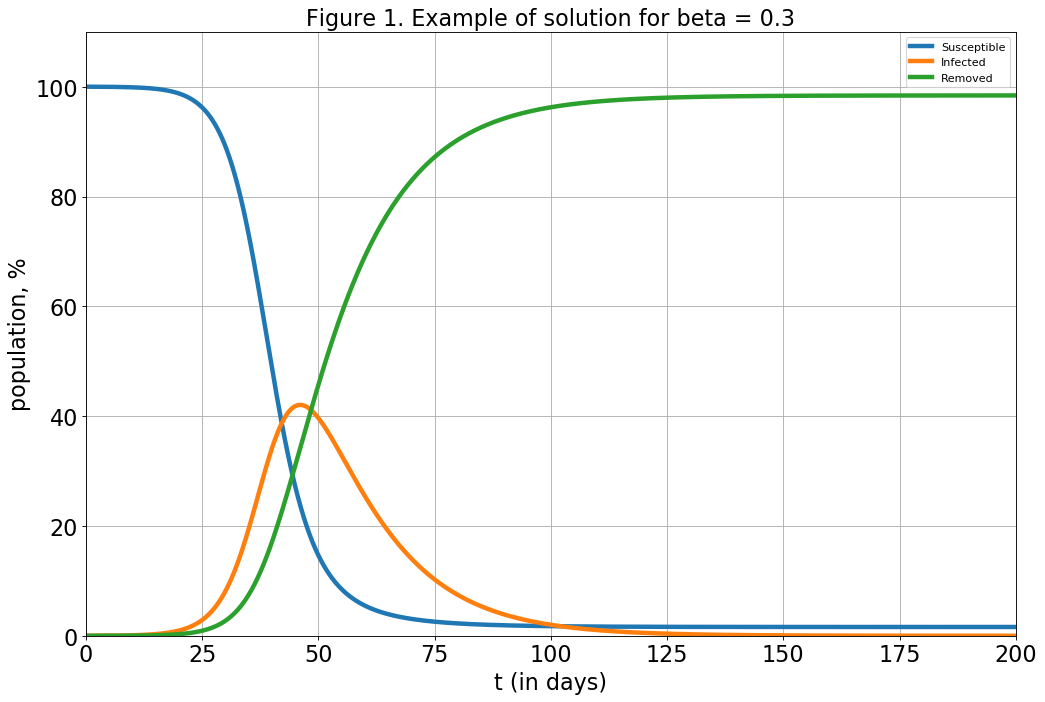

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

Dt = 0.01               # timestep Delta t
 
S_start=100 #healthy but can be infected 
I_start=0.01 #infectious
R_start=0 #recovered

N=S_start+I_start+R_start
#mu 
# beta is avg contact and gamma - recovery rate, gamma is kinda fixed

beta,gamma= 0.3,1/14
            
t_start = 0             # starttime
t_end = 200            # endtime
n_steps = int(round((t_end-t_start)/Dt))    # number of timesteps


S_arr = np.zeros(n_steps +1)
I_arr = np.zeros(n_steps +1)
R_arr=np.zeros(n_steps +1)

t_arr = np.zeros(n_steps + 1) 

t_arr[0] = t_start    

S_arr[0] =S_start   
I_arr[0]=I_start
R_arr[0]=R_start


# Euler's method
for i in range (1, n_steps + 1):  
       
        S = S_arr[i-1]
        I = I_arr[i-1]
        R = R_arr[i-1]
        t = t_arr[i-1]
        
        dSdt = -beta*I*S/N          # calculate the derivative of 
        dIdt=beta*I*S/N -gamma*I
        dRdt=gamma*I
        #dRdt=-dSdt-dEdt-dIdt
        
        S_arr[i] = S + Dt*dSdt  # calc.  at next timestep,add to array
        I_arr[i] = I + Dt*dIdt
        R_arr[i] = R + Dt*dRdt
        t_arr[i] = t + Dt       # add new value of t to array
        
# plotting the result
fig = plt.figure(figsize=(15, 10), dpi=80)                                  # create figure
plt.plot(t_arr, S_arr, linewidth = 4, label = 'Susceptible')    # plot Y to t 

plt.plot(t_arr, I_arr, linewidth = 4, label = 'Infected') 
plt.plot(t_arr, R_arr, linewidth = 4, label = 'Removed') 
plt.title('Figure 1. Example of solution for beta = 0.3', fontsize = 20)    
plt.xlabel('t (in days)', fontsize = 20)
plt.ylabel('population, %', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)                        # show grid
plt.axis([t_start, t_end, 0, 110])     # show axes measures
plt.legend()
plt.show()


In [2]:
def get_inf(beta,scale,duration, gamma = 1/14):
    Dt = 0.01               # timestep Delta t
    S_start=99.9 #healthy but can be infected 
    I_start=0.01 #infectious
    R_start=0 #recovered

    N=S_start+I_start+R_start
    #mu 
    # beta is avg contact and gamma - recovery rate, gamma is kinda fixed


    t_start = 0#loc    
    t_end = duration #+loc             endtime
    n_steps = int(round((t_end-t_start)/Dt))    # number of timesteps


    S_arr = np.zeros(n_steps +1)
    I_arr = np.zeros(n_steps +1)
    R_arr=np.zeros(n_steps +1)

    t_arr = np.zeros(n_steps + 1) 

    t_arr[0] = t_start    

    S_arr[0] =S_start   
    I_arr[0]=I_start
    R_arr[0]=R_start


    # Euler's method
    for i in range (1, n_steps + 1):  

            S = S_arr[i-1]
            I = I_arr[i-1]
            R = R_arr[i-1]
            t = t_arr[i-1]

            dSdt = -beta*I*S/N          # calculate the derivative of 
            dIdt=beta*I*S/N -gamma*I
            dRdt=gamma*I
            #dRdt=-dSdt-dEdt-dIdt

            S_arr[i] = S + Dt*dSdt  # calc.  at next timestep,add to array
            I_arr[i] = I + Dt*dIdt
            R_arr[i] = R + Dt*dRdt
            t_arr[i] = t + Dt   # add new value of t to array
            
          
    return I_arr*scale

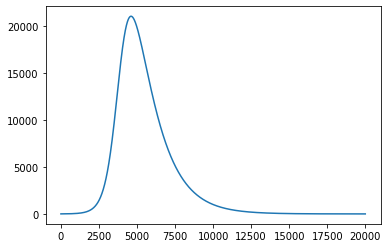

In [3]:
x = get_inf(beta=0.3,scale = 500, duration=200)

plt.plot(x)


In [4]:
def movavg(data):
    return [np.mean(data[i-7:i]) for i in range(7,len(data))]

In [5]:

df = pd.read_csv(r"C:\Users\Dima\Downloads\WHO-COVID-19-global-data.csv")
df
sweden = df[df['Country']=='Sweden']

sweden

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
94915,2020-01-03,SE,Sweden,EURO,0,0,0,0
94916,2020-01-04,SE,Sweden,EURO,0,0,0,0
94917,2020-01-05,SE,Sweden,EURO,0,0,0,0
94918,2020-01-06,SE,Sweden,EURO,0,0,0,0
94919,2020-01-07,SE,Sweden,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
95373,2021-04-05,SE,Sweden,EURO,3408,830428,3,13585
95374,2021-04-06,SE,Sweden,EURO,1450,831878,1,13586
95375,2021-04-07,SE,Sweden,EURO,3114,834992,6,13592
95376,2021-04-08,SE,Sweden,EURO,6817,841809,2,13594


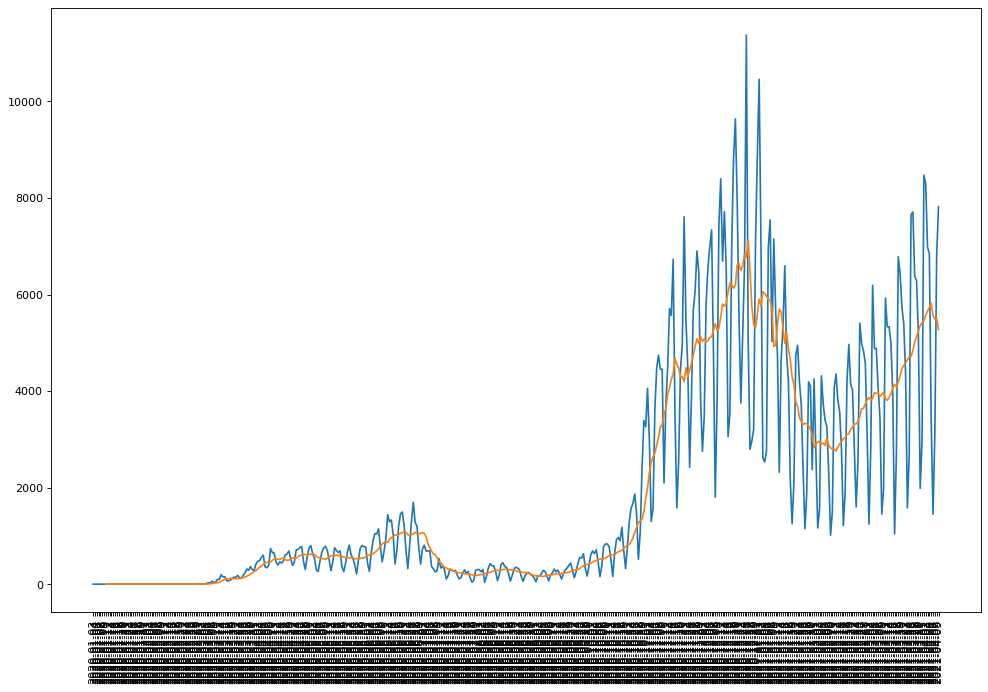

In [6]:
dates = sweden['Date_reported'] 
cases = sweden['New_cases'] 

fig = plt.figure(figsize=(15, 10), dpi=80)  
plt.xticks( rotation='vertical')
plt.plot(dates, cases)
plt.plot(dates[7:], movavg(cases.values))

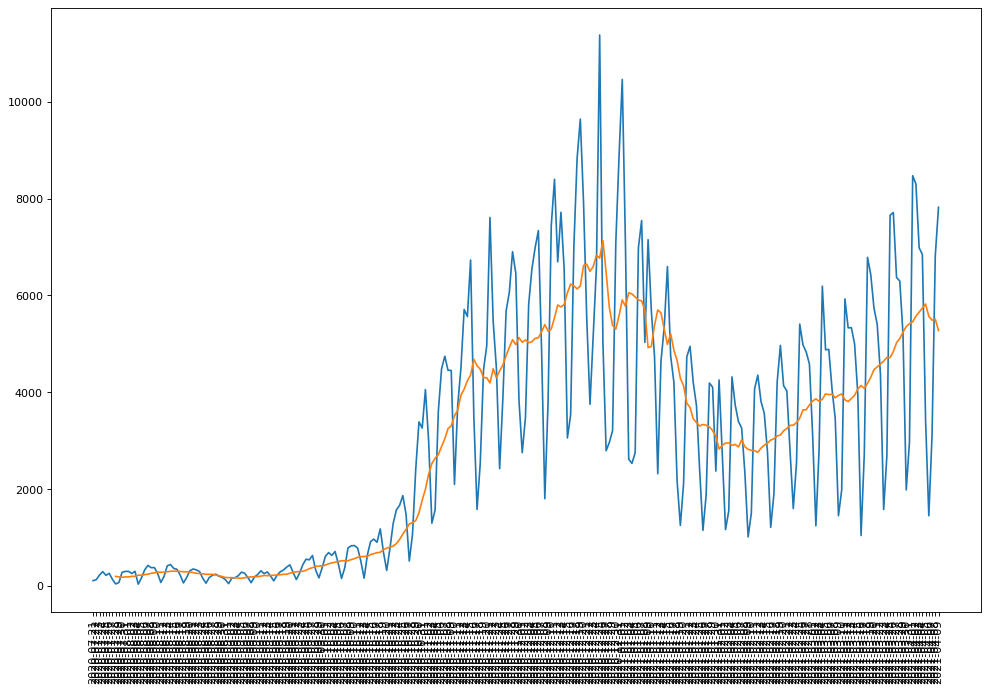

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10), dpi=80)  
plt.xticks( rotation='vertical')
plt.plot(sweden['Date_reported'][200:500], sweden['New_cases'][200:500])
plt.plot(sweden['Date_reported'][207:500], movavg(sweden['New_cases'][200:500].values))


In [8]:
# here we will fit the graph 

# That's a bit fucked up because we kinda don't have explanattory variables So we do $y = f(\beta)+\epsilon$, where $f(\beta)$ set of points of infected people for possible set of parameteres. And y is the actual number of infected people, and well, we'll just minimise SSR over $\beta$. We dont estime $\gamma$ - because it's known

In [9]:
start = 200
end = 400
cases = sweden['New_cases'][int(start):int(end)].values

In [10]:
def get_SSR(x):
    beta = x[0]
    scale = x[1]
    num_inf = movavg(cases) #maybe allow for moving dates 
    theory_num = get_inf(beta=beta,scale=scale,duration=len(num_inf), gamma = 1/14)
    theory_num=theory_num[::100][1:]
   
    return np.sum([(num_inf[i]-theory_num[i])**2 for i in range(len(num_inf))])

In [11]:
from scipy.optimize import minimize

result = minimize(get_SSR, x0=[0.3,10e3], method = 'Nelder-Mead')
result

 final_simplex: (array([[1.32624391e-01, 5.15644012e+02],
       [1.32624392e-01, 5.15644056e+02],
       [1.32624390e-01, 5.15644085e+02]]), array([35103724.39342475, 35103724.39343099, 35103724.39345244]))
           fun: 35103724.39342475
       message: 'Optimization terminated successfully.'
          nfev: 219
           nit: 115
        status: 0
       success: True
             x: array([1.32624391e-01, 5.15644012e+02])

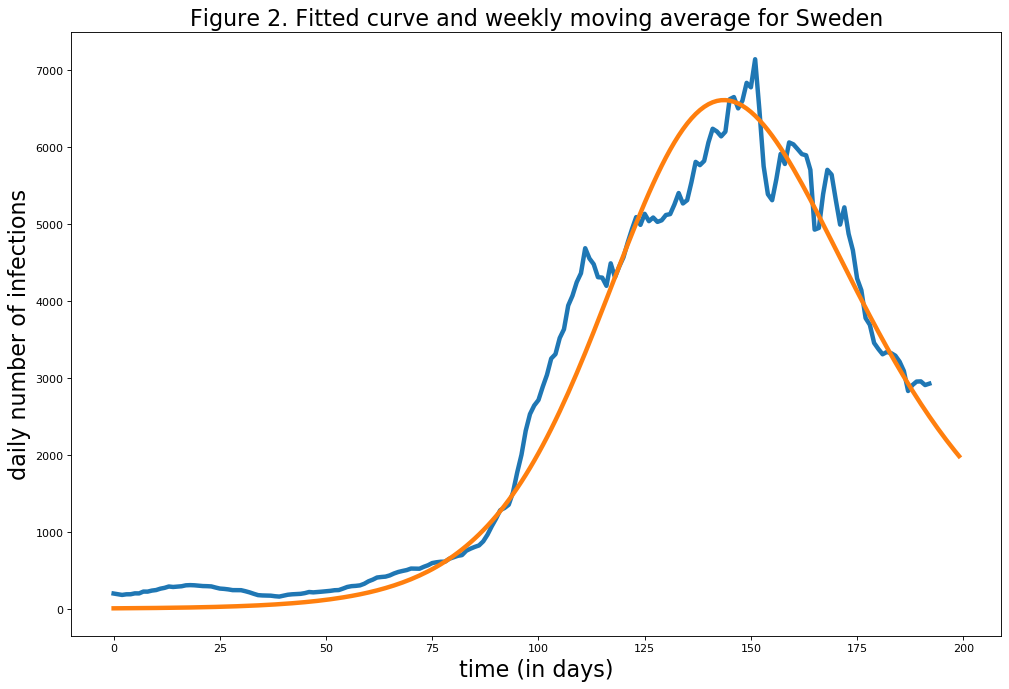

In [18]:
fig = plt.figure(figsize=(15, 10), dpi=80) 


opt_param = result['x']

plt.plot(range(len(movavg(cases))) ,movavg(cases), linewidth = 4)

theory_num = get_inf(beta=opt_param[0],scale=opt_param[1],duration=end-start)
x=theory_num[::100][1:]

plt.title('Figure 2. Fitted curve and weekly moving average for Sweden', fontsize = 20)    
plt.xlabel('time (in days)', fontsize = 20)
plt.ylabel('daily number of infections', fontsize = 20)
plt.plot(x, linewidth = 4)

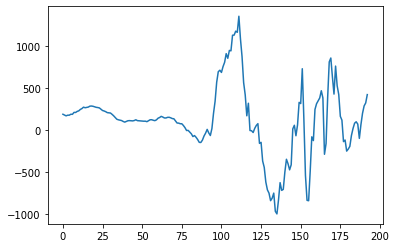

In [13]:
residuals = [movavg(cases)[i] - x[i] for i in range(len(movavg(cases)))]
plt.plot(residuals)

# we'll use MSE as fit indicator (becase we minimes SSR and so it's the mist natural choice). $MSE = \frac{\sum (\hat y_i -y_i)^2} {N} $

In [14]:
mse = 1/(len(residuals)) * np.sum([i**2 for i in residuals])
mse

181884.58234935105

1. Estimate parameters, 
Use a model that forecasting growth and compare to actual growth to see the difference
So we valide this model on parts with where measures were not introduced, see it works, try to predict parts where measures introduced and see if we get higher estimates than actual data